### Gecen haftayi hatirlayalim

## Hiyerarşik Kümeleme

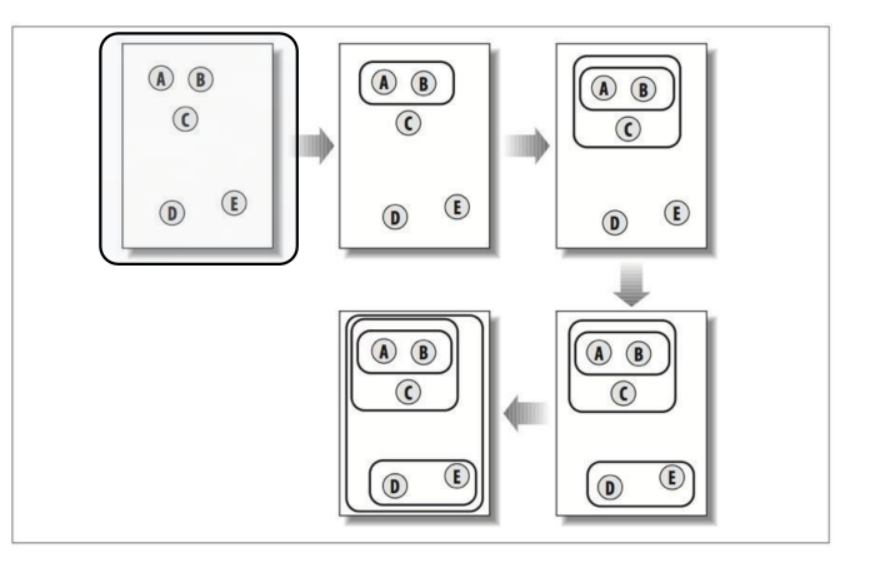

In [48]:
from math import sqrt

def pearson(v1,v2):
    # Simple sums
    sum1=sum(v1)
    sum2=sum(v2)

    # Sums of the squares
    sum1Sq=sum([pow(v,2) for v in v1])
    sum2Sq=sum([pow(v,2) for v in v2])	
    
    # Sum of the products
    pSum=sum([v1[i]*v2[i] for i in range(len(v1))])

    # Calculate r (Pearson score)
    num=pSum-(sum1*sum2/len(v1))
    den=sqrt((sum1Sq-pow(sum1,2)/len(v1))*(sum2Sq-pow(sum2,2)/len(v1)))
    if den==0: return 0

    return 1.0-num/den

In [49]:
def readfile(filename):
    lines=[line for line in open(filename, "r").readlines()]

    # First line is the column titles
    colnames=lines[0].strip().split('\t')[1:]
    rownames=[]
    data=[]
    for line in lines[1:]:
        p=line.strip().split('\t')
        # First column in each row is the rowname
        rownames.append(p[0])
        # The data for this row is the remainder of the row
        data.append([float(x) for x in p[1:]])
    return rownames,colnames,data

In [50]:
blognames, words, data = readfile('blogdata_kucuk.txt')

In [51]:
blognames

['Signal v. Noise',
 'Eschaton',
 'Google Blogoscoped',
 'Gizmodo',
 'Google Operating System',
 'Creating Passionate Users',
 'Hotair',
 'Mashable']

In [52]:
words[:10]

['before',
 'north',
 'senate',
 'industry',
 'business',
 'labor',
 'committee',
 'members',
 'my',
 'name']

In [53]:
len(words)

4826

In [58]:
data[0][0], data[0][1], data[0][300]

(2.0, 1.0, 0.0)

In [54]:
len(data)

8

In [55]:
len(data[0])

4826

In [59]:
class bicluster:
    def __init__(self,vec,left=None,right=None,distance=0.0,id=None):
        self.left=left
        self.right=right
        self.vec=vec
        self.id=id
        self.distance=distance
    def __str__(self):
        return "Node ismi: {}, left,right [{}{}], distance {}".format(
        self.id, self.left, self.right, self.distance)
    

def hcluster(rows,distance=pearson):
    distances={}
    currentclustid=-1

    # Clusters are initially just the rows
    clust=[bicluster(rows[i],id=i) for i in range(len(rows))]
    print('clust ilk')
    for c in clust:
        print(c)
    
    while len(clust)>1:
        lowestpair=(0,1)
        closest=distance(clust[0].vec,clust[1].vec)
        print(closest)

        # loop through every pair looking for the smallest distance
        for i in range(len(clust)):
            for j in range(i+1,len(clust)):
                # distances is the cache of distance calculations
                if (clust[i].id,clust[j].id) not in distances:
                    distances[(clust[i].id,clust[j].id)]=distance(clust[i].vec,clust[j].vec)

                d=distances[(clust[i].id,clust[j].id)]

                if d<closest:
                    closest=d
                    lowestpair=(i,j)
        print(lowestpair)
        # calculate the average of the two clusters
        mergevec=[(clust[lowestpair[0]].vec[i]+clust[lowestpair[1]].vec[i])/2.0
                for i in range(len(clust[0].vec))]

        # create the new cluster
        newcluster=bicluster(mergevec,left=clust[lowestpair[0]],
                             right=clust[lowestpair[1]],
                             distance=closest,id=currentclustid)

        # cluster ids that weren't in the original set are negative
        currentclustid-=1
        del clust[lowestpair[1]]
        del clust[lowestpair[0]]
        clust.append(newcluster)

    return clust[0]

In [60]:
clust = hcluster(data)

clust ilk
Node ismi: 0, left,right [NoneNone], distance 0.0
Node ismi: 1, left,right [NoneNone], distance 0.0
Node ismi: 2, left,right [NoneNone], distance 0.0
Node ismi: 3, left,right [NoneNone], distance 0.0
Node ismi: 4, left,right [NoneNone], distance 0.0
Node ismi: 5, left,right [NoneNone], distance 0.0
Node ismi: 6, left,right [NoneNone], distance 0.0
Node ismi: 7, left,right [NoneNone], distance 0.0
0.8895505887438756
(2, 4)
0.8895505887438756
(2, 5)
0.8895505887438756
(1, 5)
0.8722498437872965
(3, 4)
0.8722498437872965
(1, 3)
0.9566458870655787
(0, 2)
0.8585904821621497
(0, 1)


In [61]:
def printclust(clust,labels=None,n=0):
    # indent to make a hierarchy layout
    #print(clust.id)
    for i in range(n): print ('\t', end='')
    if clust.id<0:
        # negative id means that this is branch
        print ('-')
    else:
        # positive id means that this is an endpoint
        if labels==None: print (clust.id)
        else: print (labels[clust.id])

    # now print the right and left branches
    if clust.left!=None: printclust(clust.left,labels=labels,n=n+1)
    if clust.right!=None: printclust(clust.right,labels=labels,n=n+1)

In [62]:
printclust(clust, blognames)

-
	Hotair
	-
		Signal v. Noise
		-
			Creating Passionate Users
			-
				-
					Google Blogoscoped
					Google Operating System
				-
					Eschaton
					-
						Gizmodo
						Mashable


## K-Means Kumeleme

- Baştan kaç adet kümenin oluşacağının bilidiği kümeleme yöntemidir

- Düzlem üzerinde, her biri bir kümenin merkezini temsil etmek üzere, k adet centroid (ağırlık mekezi ) rastgele yerleştirilir.

- Her bir nokta, kendisine en yakın centroid'e atanır/bağlanır.

- Atama sonrası, her bir centroid, kendisine atanmış noktaların ortasına taşınır, ve atamalar baştan yapılır.

- Yukarıdaki proses, yapılan atamalar herhangi bir değişiklik göstermeyinceye kadar tekrar edilir.

![(K-means_convergence.gif](K-means_convergence.gif)



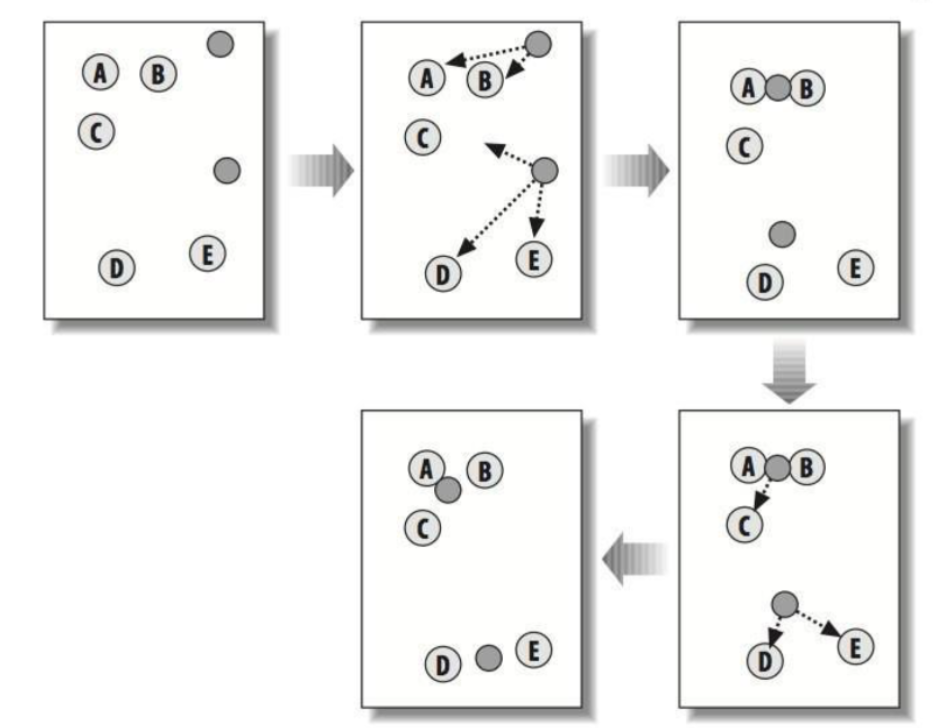

- Düzlem üzerinde, her biri bir kümenin merkezini temsil etmek üzere, k adet centroid (ağırlık mekezi ) rastgele yerleştirilir.

- Her bir nokta, kendisine en yakın centroid'e atanır/bağlanır.

- Atama sonrası, her bir centroid, kendisine atanmış noktaların ortasına taşınır, ve atamalar baştan yapılır.

- Yukarıdaki proses, yapılan atamalar herhangi bir değişiklik göstermeyinceye kadar tekrar edilir.

In [63]:
import random


def kcluster(rows,distance=pearson,k=4):
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows])) 
            for i in range(len(rows[0]))]

    # Create k randomly placed centroids
    clusters=[[random.random()*(ranges[i][1]-ranges[i][0])+ranges[i][0] 
            for i in range(len(rows[0]))] for j in range(k)]

    lastmatches=None
    for t in range(100):
        print ('Iteration {}'.format(t))
        bestmatches=[[] for i in range(k)]

        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row=rows[j]
            bestmatch=0
            for i in range(k):
                d=distance(clusters[i],row)
                if d<distance(clusters[bestmatch],row): bestmatch=i
            bestmatches[bestmatch].append(j)

        # If the results are the same as last time, this is complete
        if bestmatches==lastmatches: break
        lastmatches=bestmatches

        # Move the centroids to the average of their members
        for i in range(k):
            avgs=[0.0]*len(rows[0])
            if len(bestmatches[i])>0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m]+=rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j]/=len(bestmatches[i])
                clusters[i]=avgs

    return bestmatches




In [78]:
kclust = kcluster(data, k=5)

Iteration 0
Iteration 1
Iteration 2


In [79]:
kclust

[[], [3, 7], [], [0, 1, 6], [2, 4, 5]]

In [80]:
for c in kclust:
    siniflar = []
    for blog in c:
        siniflar.append(blognames[blog])
    print(siniflar)
        

[]
['Gizmodo', 'Mashable']
[]
['Signal v. Noise', 'Eschaton', 'Hotair']
['Google Blogoscoped', 'Google Operating System', 'Creating Passionate Users']


In [68]:
for sinif in range(len(kclust)):
    print(sinif, [blognames[r] for r in kclust[sinif]])

0 ['Google Blogoscoped', 'Google Operating System', 'Mashable']
1 ['Eschaton']
2 ['Signal v. Noise', 'Gizmodo', 'Creating Passionate Users', 'Hotair']


In [81]:
def rotatematrix(data):
    newdata=[]
    for i in range(len(data[0])):
        newrow=[data[j][i] for j in range(len(data))]
        newdata.append(newrow)
    return newdata

In [82]:
kclust=kcluster(rotatematrix(data),k=30)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12


In [83]:
kclust

[[193, 570, 590, 597, 643, 647, 651, 712, 715, 735],
 [97,
  230,
  234,
  372,
  605,
  832,
  1115,
  1118,
  1124,
  1159,
  1162,
  1174,
  1176,
  1182,
  1194,
  1197,
  1202,
  1207,
  1212,
  1221,
  1231,
  1232,
  1233,
  1239,
  1241,
  1242,
  1243,
  1244,
  1252,
  1268,
  1272,
  1277,
  1284,
  1289,
  1294,
  1304,
  1309,
  1310,
  1311,
  1318,
  1323,
  1330,
  1335,
  1347,
  1349,
  1367,
  1368,
  1372,
  1379,
  1389,
  1393,
  1396,
  1398,
  1420,
  1426,
  1434,
  1435,
  1443,
  1449,
  1452,
  1453,
  1456,
  1462,
  1471],
 [319,
  485,
  718,
  791,
  1136,
  1185,
  1195,
  1260,
  1261,
  1278,
  1297,
  1370,
  1380,
  1395,
  1459],
 [578,
  659,
  737,
  760,
  852,
  1117,
  1125,
  1127,
  1129,
  1134,
  1137,
  1143,
  1149,
  1167,
  1170,
  1179,
  1180,
  1181,
  1191,
  1192,
  1209,
  1216,
  1223,
  1228,
  1246,
  1249,
  1251,
  1253,
  1257,
  1258,
  1262,
  1263,
  1264,
  1266,
  1270,
  1283,
  1290,
  1300,
  1321,
  1325,
  1329,
 

In [84]:
for sinif in range(len(kclust)):
    print(sinif, [words[r] for r in kclust[sinif]])

0 ['experiences', 'machine', 'explaining', 'number', 'link', 'box', 'boxes', 'open', 'add', 'animal']
1 ['feature', 'counter', 'bell', 'ad', 'longer', 'location', 'bring', 'hidden', 'reduce', 'intensity', 'desires', 'advantage', 'resolution', 'immersive', 'inky', 'ios', 'expands', 'storage', 'exploration', 'stardust', 'approaching', 'sun', 'skies', 'select', 'toys', 'milk', 'pets', 'category', 'represents', 'contains', 'bat', 'allow', 'zip', 'protected', 'solutions', 'alexander', 'gym', 'luxe', 'korean', 'repeat', 'outfit', 'teens', 'annoying', 'dot', 'turn', 'option', 'purpose', 'card', 'spotted', 'alternative', 'navigating', 'missing', 'placed', 'concepts', 'somewhat', 'entering', 'cool', 'requirement', 'shift', 'intended', 'shortly', 'guides', 'takeout', 'spanish']
2 ['hide', 'interesting', 'android', 'account', 'april', 'tools', 'places', 'attachments', 'send', 'files', 'colorful', 'pages', 'holiday', 'shopping', 'photos']
3 ['google', 'interface', 'animals', 'search', 'ms', 'disli

## Arama ve Siraya Koyma

### Search Engine (Arama Motoru)

1. Dokümanları (sayfaları) derlemek için web'de emekleme
2. Aramayı hızlandırmak için endeksleme
3. Dokümanlar arasından belli bir kümeyi seçmek için sorgulama
4. Dokümanları sıraya koyma


### Crawler (Emekleme) Kodu

- Web sayfalarının yapılandırılmış olarak programlarımızda temsil edilmesi için BeautifulSoup modülünü kullanacağız

- Ayrıca urllib kütüphanesi yardımıyla web sayfaları arasında gezinecek ve bu sayfalardaki bağlantıları emekleyerek endeksleyeceğiz

### urllib kullanımmı

- Web sayfalarının indirilmesini kolaylaştırır

- Girdi olarak indirilecek olan web sayfasını URL'sini alır

```
import urllib.request as urllib2
c = urllib2.urlopen( 'https://www.istinye.edu.tr/')
contents = c.read()
print (contents[0:100])
```

In [86]:
import urllib.request as urllib2
c = urllib2.urlopen( 'https://www.istinye.edu.tr/')
contents = c.read()
print (contents[0:10000])

b'<!DOCTYPE html>\n<html lang="tr" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">\n  <head>\n  <meta charset="utf-8" />\n<link rel="canonical" href="https://www.istinye.edu.tr/tr" />\n<link rel="shortlink" href="https://www.istinye.edu.tr/tr" />\n<meta property="og:site_name" content="\xc4\xb0stinye \xc3\x9cniversitesi" />\n<meta property="og:description" content="" />\n<meta name="Generator" content="Drupal 8 (https://www.drupal.org)" />\n<meta name="MobileOptimized" content="width" />\n<meta name="HandheldFriendly" content="true" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<style>div#sliding-popup, div#sliding-popup .eu

## HTML 101

- HTML kodları, bir web sayfasının yapısını oluşturan parçacıklardır. Kullanılan kod ne olursa olsun tümü “<” ile başlar ve “>” ile bitmek zorundadır. 

- Temel bir HTML belge yapısı

    - ```<!DOCTYPE html>```: Tüm HTML belgeleri bu kod ile başlamak zorundadır. Bu kod aslında sayfanın HTML5 formatına göre kodlandığını gösterir.

    - ```<html>```: Kök etiket olarak da bilinen bu temel kullanımda tüm HTML kodları, bu iki etiket arasında tanımlanmak zorundadır.

    - ```<body>```: Görünebilir tüm HTML kod parçalarının eklendiği etiket alanıdır.

    - ```<head>```: Web sayfasının dili, başlığı ve diğer düzenlemelerinin yer aldığı etikettir.

    - ```<title>```: Web sitesinin başlık alanını tanımlamak için kullanılır. ```<title>``` etiketi, ```<head>``` etiketleri arasında olmak zorundadır.
    


- Başlık Kodu (Hx)
    - Web sayfanızdaki içeriği okunabilir parçalara bölmenizi sağlayan unsur başlıklardır. HTML temelde 6 başlık ögesini destekler. Bunlar H1, H2, H3, H4, H5 ve H6‘dan oluşur. Örnek kullanım şekli şu şekilde gösterilir:

```
<h1>Birinci başlık</h1>
<h2>İkinci başlık</h2>
<h3>Üçüncü başlık</h3>
<h4>Dördüncü başlık</h4>
<h5>Beşinci başlık</h5>
<h6>Altıncı başlık</h6>
```
```
Paragraf Kodu (<p>)
```
- Metin içerisindeki paragrafları oluşturmanızı sağlayan koddur. İçerik bölümlerini ayırırken aralarında ```<br>``` kodu eklenerek metin paragrafları oluşturulabilse de ```<p>``` kodunun kullanılması tavsiye edilir. Arama motorlarını ve tarayıcıları sayfa yapısı hakkında bilgilendirir.
    
Bağlantı Kodu (```<a>```)
- Önemli HTML link verme kodlarından biri olan ```<a>``` kodu ile diğer içerikleriniz arasında da bağlantılar oluşturabilirsiniz. Bağlantı oluşturmak için, bağlantı kurmak istediğiniz içeriğin çevresine ```<a>``` ve ```</a>``` etiketleri sarmanız gerekir. 

Yatay Çizgi Kodu (```<hr>```)
- Sayfa bölümlerini görsel olarak ayırmada yatay çizgi kodları kullanılır. Bu kod, sayfadaki geçerli konum üzerinden sağ kenar boşluğu arasında bir çizgi oluşturur. Böylece kelime veya cümle grupları yatay çizgiyle ayrılır.

Resim Kodu (```<img>```)
- ```<img>``` kodu, görüntüleri web sayfasına eklemek için kullanılır. Web sayfasına resim eklemek istediğinizde önce web sunucusuna yükleyin. Daha sonra yüklenen resmin dosya adına başvuru yapmak için bir ```<img>``` etiketi kullanabilirsiniz.

http://www.baskent.edu.tr/~tkaracay/etudio/ders/internet/html/htmlbasics/ozet.html

http://www.baskent.edu.tr/~tkaracay/etudio/ders/internet/css/tk/css00.html

##### HTML ve CSS

Class Seçicisi İle Stil Yaratma
Web dökümanında farklı yerlerde olan ama bir sınıf içine almayı istediğimiz yerleri CLASS="class-adı" ile belirleriz. Sonra bu sınıfa giren yerlerin hepsini ```<STYLE>``` damgası içinde bir seferde biçimlendirebiliriz.

Class seçimi için iki yöntem izlenebilir:

1.Yöntem
H1,H2,...,H5, P, DIV vb bir HTML damgalarından biri ile seçilmiş bir ya da daha çok bölgeyi bir class olarak düşünebiliriz. Aşağıdaki örnekte

```<p class="soru"> ... </p>```
arasında kalan metin "soru" adıyla adlandırılan class'a aittir. Dolayısıyla, .soru class'ı için yapılacak biçimlendirme ile etkilenecektir.

```
<p class="soru">
MD-Uzun yıllar matematiğe emek vermişsiniz. İlk zamanlarınızla şimdiki konumunuz arasında neleri aştınız? Neler değişti? Hayal kırıklığına uğradınız mı?
</p>
```

https://www.mynotlar.com/html_dom/element/attributes/class.aspx

In [92]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
</body>
</html>
"""


html_doc2 = """
<HTML>
<HEAD>
<TITLE>Your Title Here</TITLE>
</HEAD>
<BODY BGCOLOR="FFFFFF">
<CENTER><IMG SRC="clouds.jpg" ALIGN="BOTTOM"> </CENTER>
<HR>
<a class="link" href="http://somegreatsite.com">Link Name</a>
    is a link to another nifty site.
<H1>This is a Header</H1>
<H2>This is a Medium Header</H2>
Send me mail at <a class="mail" href="mailto:support@yourcompany.com">support@yourcompany.com</a>
<P class="first">This is a new paragraph!</P>
<P class="second"><B>This is another new paragraph!</B></P>
<B><I>This is a new sentence without a paragraph break, in bold italics.</I></B>
<HR>
</BODY>
</HTML>
"""

In [91]:
# Jupyter de htlm acmak icin
from IPython.display import HTML
HTML(html_doc)

In [93]:
# Jupyter de htlm acmak icin
from IPython.display import HTML
HTML(html_doc2)

In [89]:
print(html_doc)


<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
</body>
</html>



In [4]:
print(html_doc2)


<HTML>
<HEAD>
<TITLE>Your Title Here</TITLE>
</HEAD>
<BODY BGCOLOR="FFFFFF">
<CENTER><IMG SRC="clouds.jpg" ALIGN="BOTTOM"> </CENTER>
<HR>
<a class="link" href="http://somegreatsite.com">Link Name</a>
    is a link to another nifty site.
<H1>This is a Header</H1>
<H2>This is a Medium Header</H2>
Send me mail at <a class="mail" href="mailto:support@yourcompany.com">support@yourcompany.com</a>
<P class="first">This is a new paragraph!</P>
<P class="second"><B>This is another new paragraph!</B></P>
<B><I>This is a new sentence without a paragraph break, in bold italics.</I></B>
<HR>
</BODY>
</HTML>



In [90]:
# Jupyter de htlm acmak icin
from IPython.display import HTML
HTML(html_doc)

In [6]:
# Jupyter de htlm acmak icin
from IPython.display import HTML
HTML(html_doc)

### Beautiful Soup

- Bir web sayfasını ayrıştırmak ve yapılandırılmış bir şekilde Python veri tiplerinde saklamak için kullanılır

- Bir sayfanın her hangi bir elemanına, kimliği, tipi ya da herhangi başka bir özelliği ile ulaşılmasını ve o elemanın içeriğinin "string" olarak döndürülmesini sağlar

- Sürüm 4 olduğundan emin olun(bs4)

- BeautifulSoup genellikle urllib ile birlikte kullanılır

In [94]:
from bs4 import BeautifulSoup
import urllib.request as urllib2

c = urllib2.urlopen( 'https://www.istinye.edu.tr/')
contents = c.read()
soup = BeautifulSoup(contents)
print (soup.prettify())
print("-"*20)


<!DOCTYPE html>
<html dir="ltr" lang="tr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
 <head>
  <meta charset="utf-8"/>
  <link href="https://www.istinye.edu.tr/tr" rel="canonical"/>
  <link href="https://www.istinye.edu.tr/tr" rel="shortlink"/>
  <meta content="İstinye Üniversitesi" property="og:site_name"/>
  <meta content="" property="og:description"/>
  <meta content="Drupal 8 (https://www.drupal.org)" name="Generator"/>
  <meta content="width" name="MobileOptimized"/>
  <meta content="true" name="HandheldFriendly"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <style>
   div#sliding-popup, div#sliding-popup .eu-cookie-withdraw

In [103]:
# Daha basit bir HTML sayfsi uzerinden bakalim:

from bs4 import BeautifulSoup
import urllib.request as urllib2
soup = BeautifulSoup(html_doc)
print (soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>



In [97]:
print ('title:', soup.title)
print ('title.name:',soup.title.name)
print ('title.string:',soup.title.string)


title: <title>The Dormouse's story</title>
title.name: title
title.string: The Dormouse's story


In [98]:
soup.body

<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body>

In [99]:
soup.body.string # bu bos gelmesi normal

In [10]:
print(soup.title.parent.name)

head


In [104]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [102]:
soup.p.string

"The Dormouse's story"

In [12]:
soup.find('p')

<p class="title"><b>The Dormouse's story</b></p>

In [13]:
soup.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [107]:
soup.p['class']

['title']

In [108]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [109]:
print ('tum a lar:',soup.find_all('a'))

tum a lar: [<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [16]:
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [111]:
soup.find_all(class_="sister")

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [17]:
head_tag = soup.head
print (head_tag)

<head><title>The Dormouse's story</title></head>


In [112]:
# A ya da title bul
print (soup.find_all(['a', 'title']))

[<title>The Dormouse's story</title>, <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]


In [114]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [113]:
# Butun a tag'lerini bul, ilkinin ID'sini yaz
print (soup.find_all('a')[0].get('id'))

link1


In [115]:
print (soup.find_all('a')[0].get('class'))

['sister']


In [116]:
print (soup.find_all('a')[0].string)

Elsie


Sayfanin a tagleri icindeki tum urllere erismek icin:

In [117]:
for link in soup.find_all('a'):
    print (link.get("href"))


http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


Ya da sayfadaki butun text bilgisine erismek icin:


In [22]:
soup.get_text()

"The Dormouse's story\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n\n\n"

In [118]:
# A ya da B bul
soup.find_all(["a","b"])

[<b>The Dormouse's story</b>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [119]:
# Bu tag'de class var ama id elemani yok
def class_var_id_yok(tag):
    return tag.has_attr('class') and not tag.has_attr('id')

In [121]:
deneme = soup.find_all(class_var_id_yok)
print(deneme)
len(deneme)

[<p class="title"><b>The Dormouse's story</b></p>, <p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>, <p class="story">...</p>]


3

In [124]:
# Bu tag'de class var ama id elemani yok
def class_var_stroy_yok(tag):
    return tag.has_attr('class') and tag.get('class')!='story'

In [125]:
deneme = soup.find_all(class_var_stroy_yok)
print(deneme)
len(deneme)

[<p class="title"><b>The Dormouse's story</b></p>, <p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>, <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>, <p class="story">...</p>]


6

In [28]:
import re

soup.find(string = re.compile("sisters"))

'Once upon a time there were three little sisters; and their names were\n'

In [29]:
soup.find(class_ = re.compile("itl"))

<p class="title"><b>The Dormouse's story</b></p>

In [126]:
def has_five_chars_or_less (css_class):
    return css_class is not None and len(css_class)<=5

def has_six_chars (css_class):
    return css_class is not None and len(css_class) == 6

In [127]:
soup.find_all(class_ = has_five_chars_or_less)

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [33]:
soup.find_all(class_ = has_six_chars)

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [131]:
import re

# Extract the text from an HTML page (no tags)
def gettextonly(soup):
    v = soup.string
    if v == None:
        c = soup.contents
        resulttext = ''
        for t in c:
            subtext = gettextonly(t)
            resulttext += subtext + '\n'
        return resulttext
    else:
        return v.strip()

# Separate the words by any non-whitespace character
def separatewords(text):
    splitter = re.compile('\\W+')
    return [s.lower() for s in splitter.split(text) if s != '']

In [129]:
text = gettextonly(soup)
print(text)

The Dormouse's story


The Dormouse's story

Once upon a time there were three little sisters; and their names were
Elsie
,
Lacie
and
Tillie
;
and they lived at the bottom of a well.


...








In [132]:
words = separatewords(text)
print(words)

['the', 'dormouse', 's', 'story', 'the', 'dormouse', 's', 'story', 'once', 'upon', 'a', 'time', 'there', 'were', 'three', 'little', 'sisters', 'and', 'their', 'names', 'were', 'elsie', 'lacie', 'and', 'tillie', 'and', 'they', 'lived', 'at', 'the', 'bottom', 'of', 'a', 'well']


In [133]:
from bs4 import BeautifulSoup
import urllib.request as urllib2

c = urllib2.urlopen( 'https://www.istinye.edu.tr/')
contents = c.read()
soup = BeautifulSoup(contents)
text = gettextonly(soup)
print(text)

html




















div#sliding-popup, div#sliding-popup .eu-cookie-withdraw-banner, .eu-cookie-withdraw-tab {background: #2f292b} div#sliding-popup.eu-cookie-withdraw-wrapper { background: transparent; } #sliding-popup h1, #sliding-popup h2, #sliding-popup h3, #sliding-popup p, #sliding-popup label, #sliding-popup div, .eu-cookie-compliance-more-button, .eu-cookie-compliance-secondary-button, .eu-cookie-withdraw-tab { color: #ffffff;} .eu-cookie-withdraw-tab { border-color: #ffffff;}











İstinye Üniversitesi |



























































































































































[if lte IE 8]>
<script src="/sites/betatest.istinye.edu.tr/files/js/js_VtafjXmRvoUgAzqzYTA3Wrjkx9wcWhjP0G4ZnnqRamA.js"></script>
<![endif]

Global site tag (gtag.js) - Google Analytics



window.dataLayer = window.dataLayer || [];
	  function gtag(){dataLayer.push(arguments);}
	  gtag('js', new Date());
	
	  gtag('

In [134]:
words = separatewords(text)
print(words)

['html', 'div', 'sliding', 'popup', 'div', 'sliding', 'popup', 'eu', 'cookie', 'withdraw', 'banner', 'eu', 'cookie', 'withdraw', 'tab', 'background', '2f292b', 'div', 'sliding', 'popup', 'eu', 'cookie', 'withdraw', 'wrapper', 'background', 'transparent', 'sliding', 'popup', 'h1', 'sliding', 'popup', 'h2', 'sliding', 'popup', 'h3', 'sliding', 'popup', 'p', 'sliding', 'popup', 'label', 'sliding', 'popup', 'div', 'eu', 'cookie', 'compliance', 'more', 'button', 'eu', 'cookie', 'compliance', 'secondary', 'button', 'eu', 'cookie', 'withdraw', 'tab', 'color', 'ffffff', 'eu', 'cookie', 'withdraw', 'tab', 'border', 'color', 'ffffff', 'i̇stinye', 'üniversitesi', 'if', 'lte', 'ie', '8', 'script', 'src', 'sites', 'betatest', 'istinye', 'edu', 'tr', 'files', 'js', 'js_vtafjxmrvougazqzyta3wrjkx9wcwhjp0g4znnqrama', 'js', 'script', 'endif', 'global', 'site', 'tag', 'gtag', 'js', 'google', 'analytics', 'window', 'datalayer', 'window', 'datalayer', 'function', 'gtag', 'datalayer', 'push', 'arguments', '

In [135]:
from bs4 import BeautifulSoup
import urllib.request as urllib2

c = urllib2.urlopen( 'https://muhendislik.istinye.edu.tr/tr')
contents = c.read()
soup = BeautifulSoup(contents)
text = gettextonly(soup)
print(text)

html




(function(i,s,o,g,r,a,m){i["GoogleAnalyticsObject"]=r;i[r]=i[r]||function(){(i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)})(window,document,"script","https://www.google-analytics.com/analytics.js","ga");ga("create", "UA-74437648-13", {"cookieDomain":"auto"});ga("set", "anonymizeIp", true);ga("send", "pageview");





















Ana Sayfa | Mühendislik ve Doğa Bilimleri Fakültesi

































































































































































[if lte IE 8]>
<script src="/core/assets/vendor/html5shiv/html5shiv.min.js?v=3.7.3"></script>
<![endif]

Facebook Pixel Code

!function(f,b,e,v,n,t,s)
{if(f.fbq)return;n=f.fbq=function(){n.callMethod?
n.callMethod.apply(n,arguments):n.queue.push(arguments)};
if(!f._fbq)f._fbq=n;n.push=n;n.loaded=!0;n.version='2.0';
n.queue=[];t=b

In [136]:
words = separatewords(text)
print(words)

['html', 'function', 'i', 's', 'o', 'g', 'r', 'a', 'm', 'i', 'googleanalyticsobject', 'r', 'i', 'r', 'i', 'r', 'function', 'i', 'r', 'q', 'i', 'r', 'q', 'push', 'arguments', 'i', 'r', 'l', '1', 'new', 'date', 'a', 's', 'createelement', 'o', 'm', 's', 'getelementsbytagname', 'o', '0', 'a', 'async', '1', 'a', 'src', 'g', 'm', 'parentnode', 'insertbefore', 'a', 'm', 'window', 'document', 'script', 'https', 'www', 'google', 'analytics', 'com', 'analytics', 'js', 'ga', 'ga', 'create', 'ua', '74437648', '13', 'cookiedomain', 'auto', 'ga', 'set', 'anonymizeip', 'true', 'ga', 'send', 'pageview', 'ana', 'sayfa', 'mühendislik', 've', 'doğa', 'bilimleri', 'fakültesi', 'if', 'lte', 'ie', '8', 'script', 'src', 'core', 'assets', 'vendor', 'html5shiv', 'html5shiv', 'min', 'js', 'v', '3', '7', '3', 'script', 'endif', 'facebook', 'pixel', 'code', 'function', 'f', 'b', 'e', 'v', 'n', 't', 's', 'if', 'f', 'fbq', 'return', 'n', 'f', 'fbq', 'function', 'n', 'callmethod', 'n', 'callmethod', 'apply', 'n', 'a

In [158]:
from bs4 import BeautifulSoup
import urllib.request as urllib2

main_url = 'https://books.toscrape.com/index.html'
c = urllib2.urlopen(main_url)
contents = c.read()
soup = BeautifulSoup(contents)
soup.prettify()



'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-us">\n <!--<![endif]-->\n <head>\n  <title>\n   All products | Books to Scrape - Sandbox\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <meta content="24th Jun 2016 09:29" name="created"/>\n  <meta content="" name="description"/>\n  <meta content="width=device-width" name="viewport"/>\n  <meta content="NOARCHIVE,NOCACHE" name="robots"/>\n  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n  <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>\n  <link href="static/oscar/css/styles.css" rel=

In [144]:
navlistler = soup.find_all(class_='nav nav-list')

In [145]:
print(navlistler)

[<ul class="nav nav-list">
<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
          

In [151]:
a_listesi = navlistler[0].findChildren("a" , recursive=True)

In [152]:
print(a_listesi[1])

<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>


In [156]:
link1 = a_listesi[1].get('href')

In [155]:
a_listesi[1].string.strip()

'Travel'

In [157]:
print(link1)

catalogue/category/books/travel_2/index.html


In [159]:
from urllib.parse import urljoin
link1_birlesmis = urljoin(main_url, link1)
print(link1_birlesmis)

https://books.toscrape.com/catalogue/category/books/travel_2/index.html


In [160]:
from bs4 import BeautifulSoup
import urllib.request as urllib2

c = urllib2.urlopen(link1_birlesmis)
contents = c.read()
soup1 = BeautifulSoup(contents)
soup1.prettify()

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-us">\n <!--<![endif]-->\n <head>\n  <title>\n   Travel | \n     Books to Scrape - Sandbox\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <meta content="24th Jun 2016 09:29" name="created"/>\n  <meta content="\n    \n" name="description"/>\n  <meta content="width=device-width" name="viewport"/>\n  <meta content="NOARCHIVE,NOCACHE" name="robots"/>\n  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n  <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n  <link href="../../../../static/oscar/favicon.ico" rel="shortcut icon"/>\n  <link href="../../../../